# Scenario Analysis
In the dynamic world of financial markets, traders and investors are constantly seeking strategies that can help them navigate through uncertainties and achieve desirable outcomes. One crucial aspect of evaluating a trading strategy's effectiveness is understanding how it performs under different market scenarios. This is where scenario analysis comes into play.

This notebook focuses on utilizing scenario analysis as a powerful tool to evaluate the performance of a trading strategy. Scenario analysis involves considering various hypothetical market conditions and analyzing the strategy's response to each scenario. By examining how the strategy behaves across different scenarios, traders can gain valuable insights into its strengths, weaknesses, and potential risks.

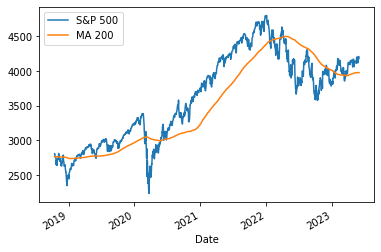

In [1]:
from datetime import datetime
import pandas as pd
import yfinance as yf

sp500 = yf.download('^GSPC','2018-01-01',datetime.today(), progress=False)['Close'].rename('S&P 500')
ma_200 = sp500.rolling(window=200).mean().rename('MA 200')
data = pd.concat([sp500, ma_200], axis=1).dropna()
data.plot();

We will use the same trading strategy as discussed in the previous notebook:

In [2]:
def evaluate_ma200_strat(prices):
    initial_investment = 100
    prices = prices.rename('price')
    ma_200 = prices.rolling(window=200).mean().rename('MA 200')
    data = pd.concat([prices, ma_200], axis=1).dropna()
    data['long'] = data['MA 200'] < data['price']
    data['return'] = data['price'].pct_change()
    data.loc[~data['long'], 'return'] = 0
    data.dropna(inplace=True)
    final_investment = initial_investment
    for r in data['return']:
        final_investment *= r + 1
    return final_investment/100

final_investment = evaluate_ma200_strat(sp500)
print('Final value: {:.2%}'.format(round(final_investment, 4)))

Final value: 257.91%


### 2008 Banking Crisis

The 2008 financial crisis, also known as the Global Financial Crisis (GFC), had its roots in the United States housing market and the subsequent collapse of several major financial institutions. While the effects of the crisis were felt globally, pinpointing specific start and end dates can be challenging as it unfolded over an extended period of time. However, we can identify key milestones that mark the crisis's significant events. Here are some notable dates:

1. August 9, 2007: The crisis begins to emerge as BNP Paribas suspends redemptions on three investment funds due to subprime mortgage exposure.
2. September 15, 2008: Lehman Brothers, a major investment bank, files for bankruptcy, sending shockwaves throughout the financial industry.
3. September 16, 2008: The U.S. government bails out American International Group (AIG), one of the world's largest insurance companies, to prevent its collapse.
4. September 29, 2008: The U.S. Congress rejects the initial bailout plan proposed by the U.S. Treasury, causing significant turmoil in financial markets.
5. October 3, 2008: The U.S. government passes the Emergency Economic Stabilization Act, which establishes the Troubled Asset Relief Program (TARP) to stabilize the financial system.
6. March 9, 2009: Stock markets reach their lowest point during the crisis, with the Dow Jones Industrial Average hitting its nadir.

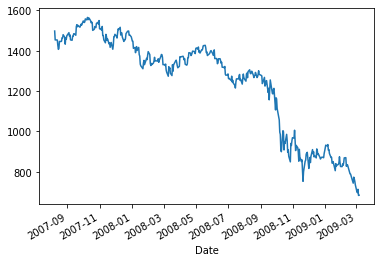

In [3]:
# Complete
sp500_crisis.plot();

In [4]:
crisis_perf = evaluate_ma200_strat(sp500_crisis)
print('Final value: {:.2%}'.format(round(crisis_perf, 4)))

Final value: 100.00%
